### 1. Chuẩn bị dữ liệu

In [2]:
!pip install tensorflow

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/332.0 MB 6.5 MB/s eta 0:00:51
   ---------------------------------------- 2.4/332.0 MB 6.8 MB/s eta 0:00:49
   ---------------------------------------- 3.7/332.0 MB 6.8 MB/s eta 0:00:49
    --------------------------------------- 5.2/332.0 MB 6.9 MB/s eta 0:00:48
    --------------------------------------- 6.0/332.0 MB 6.6 MB/s eta 0:00:50
    --------------------------------------- 7.3/332.0 MB 6.0 MB/s eta 0:00:55
    --------------------------------------- 7.9/332.0 MB 5.7 MB/s eta 0:00:57
   - -------------------------------------- 8.4/332.0 MB 5.4 MB/s eta 0:01:01
   - -------------------------------------- 8.9/332.0 MB 4.9 MB/s eta 0:01:06
   - -------------------------------------- 9.2/332.0 MB 4.7 MB/s eta 0:01:09
   - -------------------------------------- 9.7/332.0 MB 4.4 MB/s eta 0:01:13
   - -------------------------------------- 10.2/332.0 MB 4.2 MB/s eta 

In [ ]:
from tensorflow import keras 
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from datetime import datetime

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'



df =pd.read_csv(r"C:\Users\NGUYEN MINH TUYET\Stock pj\clean_stock_data.csv")
print(df.head())
print(df.info())
print(df.describe())

         time symbol   open   high    low  close  volume
0  2020-01-02    A32  17.05  17.05  17.05  17.05   300.0
1  2020-01-03    A32  14.92  14.92  14.92  14.92   500.0
2  2020-01-04    A32  14.92  14.92  14.92  14.92     0.0
3  2020-01-05    A32  14.92  14.92  14.92  14.92     0.0
4  2020-01-06    A32  14.92  14.92  14.92  14.92     0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3318519 entries, 0 to 3318518
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   time    object 
 1   symbol  object 
 2   open    float64
 3   high    float64
 4   low     float64
 5   close   float64
 6   volume  float64
dtypes: float64(5), object(2)
memory usage: 177.2+ MB
None
               open          high           low         close        volume
count  3.318519e+06  3.318519e+06  3.318519e+06  3.318519e+06  3.318519e+06
mean   1.699403e+01  1.719442e+01  1.680896e+01  1.701830e+01  3.405058e+05
std    2.441856e+01  2.465033e+01  2.417042e+01  2.441095e+01  2.19565

In [9]:
symbol = "ACB"

# Lọc dữ liệu theo symbol
data = df[df["symbol"] == symbol].copy()

# Sắp xếp theo time
data = data.sort_values("time")

# Reset index và đặt tên
data = data.reset_index(drop=True)
data.index.name = "index"

data = data.rename(columns={"time": "date", "symbol":"name"})

data.head()

,date,name,open,high,low,close,volume
index,,,,,,,
0,2020-01-02,ACB,6.58,6.64,6.55,6.64,1163109.0
1,2020-01-03,ACB,6.64,6.70,6.61,6.64,1055528.0
2,2020-01-04,ACB,6.64,6.70,6.61,6.64,0.0
3,2020-01-05,ACB,6.64,6.70,6.61,6.64,0.0
4,2020-01-06,ACB,6.64,6.64,6.49,6.49,1286035.0


### 2. Tổng quan dữ liệu

#### 2.1. Mô tả dữ liệu

In [10]:
print(data.head())
print(data.info())
print(data.describe())

             date name  open  high   low  close     volume
index                                                     
0      2020-01-02  ACB  6.58  6.64  6.55   6.64  1163109.0
1      2020-01-03  ACB  6.64  6.70  6.61   6.64  1055528.0
2      2020-01-04  ACB  6.64  6.70  6.61   6.64        0.0
3      2020-01-05  ACB  6.64  6.70  6.61   6.64        0.0
4      2020-01-06  ACB  6.64  6.64  6.49   6.49  1286035.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2148 non-null   object 
 1   name    2148 non-null   object 
 2   open    2148 non-null   float64
 3   high    2148 non-null   float64
 4   low     2148 non-null   float64
 5   close   2148 non-null   float64
 6   volume  2148 non-null   float64
dtypes: float64(5), object(2)
memory usage: 117.6+ KB
None
              open         high          low        close        volume
count  2148.00000

#### 2.2. Biểu diễn giá mở của và đóng cửa

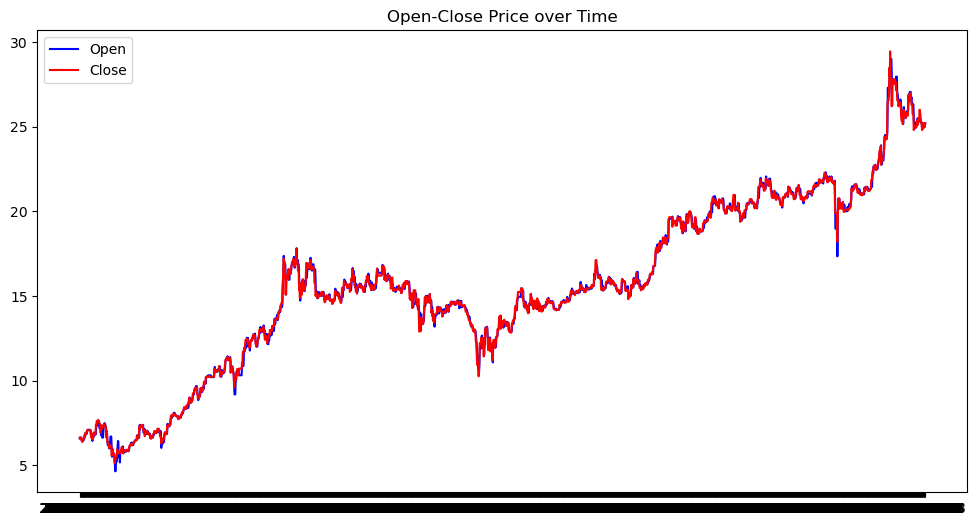

In [13]:
# Initial Data Visualization
# Plot 1 - Open and Close Prices of time
plt.figure(figsize=(12,6))
plt.plot(data['date'], data['open'], label="Open",color="blue")
plt.plot(data['date'], data['close'], label="Close",color="red")
plt.title("Open-Close Price over Time")
plt.legend()
plt.show()

#### 2.3. Lưu lượng giao dịch (check ngoại lai)

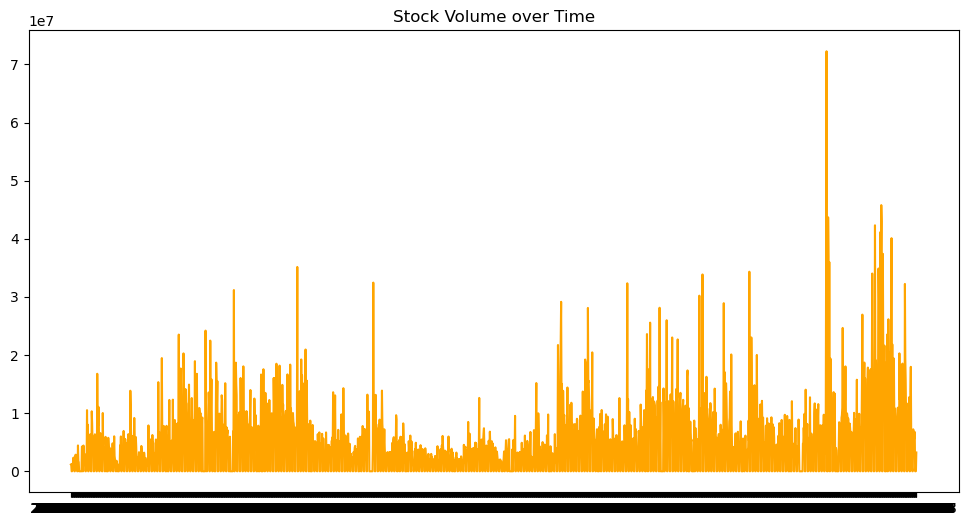

In [14]:
# Plot 2 - Trading Volume (check for outliers)
plt.figure(figsize=(12,6))
plt.plot(data['date'],data['volume'],label="Volume",color="orange")
plt.title("Stock Volume over Time")
plt.show()

In [15]:
# Drop non-numeric columns
numeric_data = data.select_dtypes(include=["int64","float64"])

#### 2.4. Kiểm tra tính tương quan

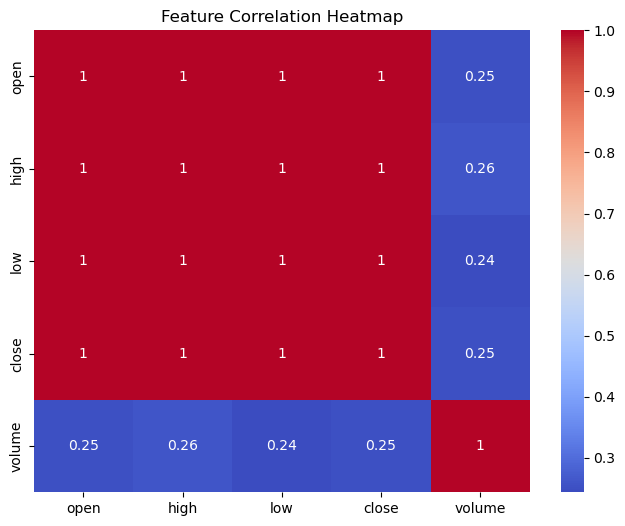

In [16]:
# Plot 3 - Check for correlation between features
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

#### 2.5. Chuyển định dạng thời gian về datetime

Text(0.5, 1.0, 'Price over time')

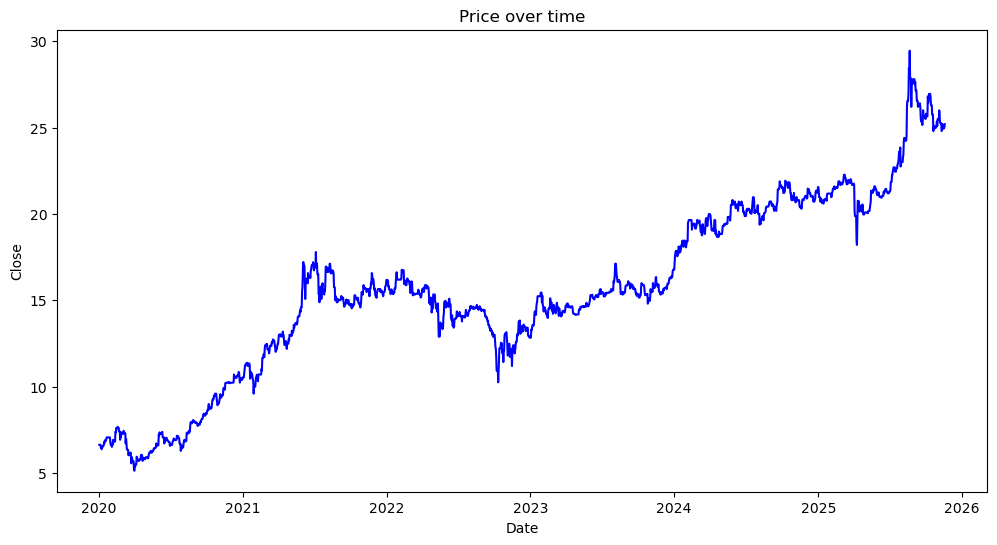

In [17]:
# Convert the Data into Date time then create a date filter
data['date'] = pd.to_datetime(data['date'])

prediction = data.loc[
    (data['date'] > datetime(2020,1,1)) &
    (data['date'] < datetime(2026,1,1))
]

plt.figure(figsize=(12,6))
plt.plot(data['date'], data['close'],color="blue")
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Price over time")

#### 2.6. Chọn giá đóng cửa

In [18]:
# Prepare for the LSTM Model (Sequential)
stock_close = data.filter(["close"])
dataset = stock_close.values #convert to numpy array
training_data_len = int(np.ceil(len(dataset) * 0.95))

In [19]:
# Preprocessing Stages
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

training_data = scaled_data[:training_data_len] #95% of all out data

X_train, y_train = [], []

In [20]:
# Create a sliding window for our stock (60 days)
for i in range(60, len(training_data)):
    X_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

**First Layer: This is like a brain to help the model understand patterns**
- Number 64: the number of memory cells. Higher number, the more complex problems
- return_sequence: after done, give me the full list of ideas for the next layer
- input_shape: tell the first LSTM layer what kind of date expect\
*=> The first LSTM layer learns patterns from past stock prices over time.*

**Second Layer: This is another brain, but this time it only gives the final idea, not a list of thoughts**
- Number 64: the number of helpers to help the brain. Higher number, the more complex problems
- return_sequence: this tells the model to return a single output (the final prediction) instead of a sequence\
*=> This layer distills the important patterns form the first layer and prepares to make a final prediction.*

**Dense Layer: turns complex patterns into a decision**
- Number 128: this is a regular neutral network layer with 128 neurons to help make the final decision
- activation: helps the model introduce non-linearity (ReLU - Rectified Linear Unit)\
*=> This layer helps the model adjust and refine its understanding of the data, learning more complicated trends.*

**Dropout Layout: This layer randomly drops out 50% of the neurons during training**
- Note: This prevents overfitting (when the model memorizes the data too well but struggies with new data).\
*=> It keeps the model from being too sensitive to the training data and makes it perform better*

**Final Dense Layer: This layer makes the final prediction**
- Note: a simple layer with 1 neuron that outputs one value - the predicted stock price.\
=> This is the layer that actually makes the prediction for the stock price

**Model Compilation: This compiles for the model to tell it how to learn. We are giving it information to improve**
- optimizer: Adam is a popular optimizer that helps the model adjust its learning. Works well with time-series data.
- loss: MAE measures how far the predictions are from the actual prices. The lower the MAE, the better.
- metrics: This is another performance metric that checks how accurate the predictions are.

In [21]:
# Build the Model
model = keras.models.Sequential()

# First Layer
model.add(keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1],1)))

# Second Layer
model.add(keras.layers.LSTM(64, return_sequences=False))

# 3rd Layer (Dense)
model.add(keras.layers.Dense(128, activation="relu"))

# 4th Layer (Dropout)
model.add(keras.layers.Dropout(0.5))

# Final Output Layer
model.add(keras.layers.Dense(1))

model.summary()
model.compile(optimizer="adam",
              loss="mae",
              metrics=[keras.metrics.RootMeanSquaredError()])


training = model.fit(X_train, y_train, epochs=20, batch_size=32)

c:\Users\NGUYEN MINH TUYET\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2003 - root_mean_squared_error: 0.3167
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1201 - root_mean_squared_error: 0.1726
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1135 - root_mean_squared_error: 0.1590
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1108 - root_mean_squared_error: 0.1601
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1065 - root_mean_squared_error: 0.1512
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0998 - root_mean_squared_error: 0.1437
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0997 - root_mean_squared_error: 0.1431
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0980 - root_mean_squared_error: 0.1418
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0992 - root_mean_squared_error: 0.1417
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1017 - root_mean_squared_error: 0.1466

In [22]:
# Prep the test data
test_data = scaled_data[training_data_len - 60:]
X_test, y_test = [], dataset[training_data_len:]


for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1 ))

In [23]:
# Make a Prediction
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step


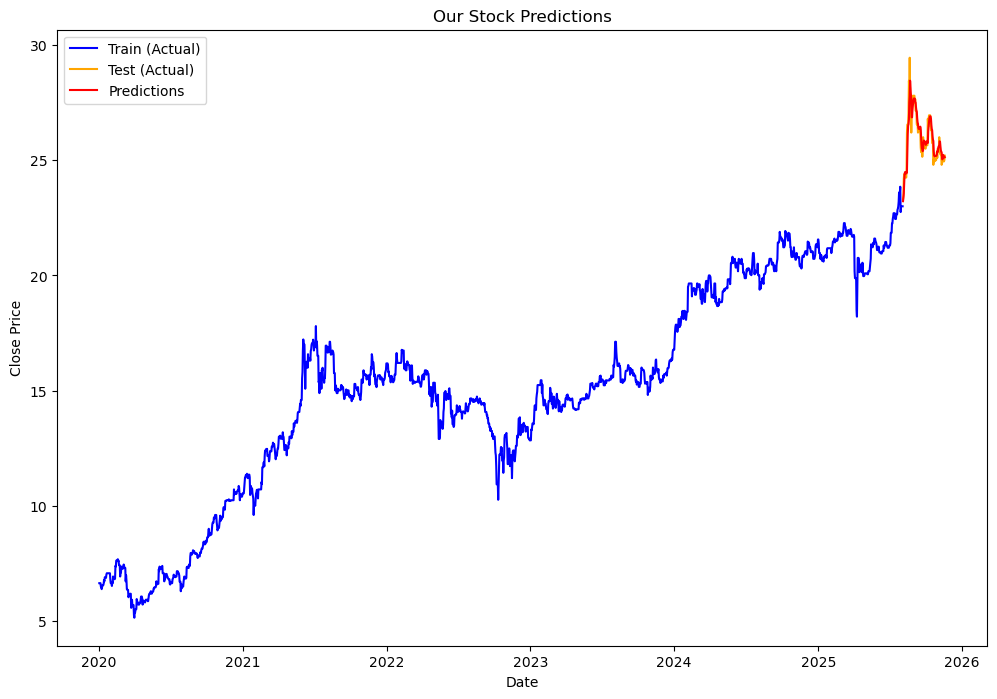

In [24]:
# Plotting data
train = data[:training_data_len]
test =  data[training_data_len:]

test = test.copy()

test['Predictions'] = predictions

plt.figure(figsize=(12,8))
plt.plot(train['date'], train['close'], label="Train (Actual)", color='blue')
plt.plot(test['date'], test['close'], label="Test (Actual)", color='orange')
plt.plot(test['date'], test['Predictions'], label="Predictions", color='red')
plt.title("Our Stock Predictions")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()